Problem Statement : Create a model to predict future gold prices using past price data. The goal is to make accurate forecasts that can help investors and others understand where gold prices might be headed.

# Installing necessary packages

In [23]:
# Installing necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
# from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [28]:
df = pd.read_csv(Path('..\dataset\gold_monthly_csv.csv'))

In [29]:
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [31]:
df.tail()

,Date,Price
842,2020-03,1593.764
843,2020-04,1680.030
844,2020-05,1715.697
845,2020-06,1734.032
846,2020-07,1840.807


In [30]:
df.shape

(847, 2)

# Data Exploration

In [32]:
print(f'Date range of gold prices available from - {df.loc[:, "Date"][0]} to {df.loc[:, "Date"][len(df)-1]}')

Date range of gold prices available from - 1950-01 to 2020-07


About Data: 

- The dataset comprises 847 entries, covering the period from January 1950 to July 2020.
- It includes two columns: 'Date' and 'Price', representing the date of observation and the corresponding gold price, respectively.
- Gold prices exhibit variability, ranging from a minimum value of 34.49 to a maximum value of 1840.81.
- The mean gold price across the dataset is 416.56, indicating the average price observed over the given period.
- The standard deviation of 453.67 suggests significant variability around the mean, highlighting fluctuations in gold prices.
- The median price, at 319.62, implies a potential right-skewed distribution, indicating that higher-priced outliers may influence the mean.
- This dataset offers a comprehensive historical perspective on gold prices, facilitating analysis and forecasting to inform investment strategies.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    847 non-null    object 
 1   Price   847 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.4+ KB


In [34]:
df['Date'] = pd.to_datetime(df.Date)

In [36]:
df.set_index('Date', inplace=True)

In [37]:
df.head()

,Price
Date,
1950-01-01,34.73
1950-02-01,34.73
1950-03-01,34.73
1950-04-01,34.73
1950-05-01,34.73


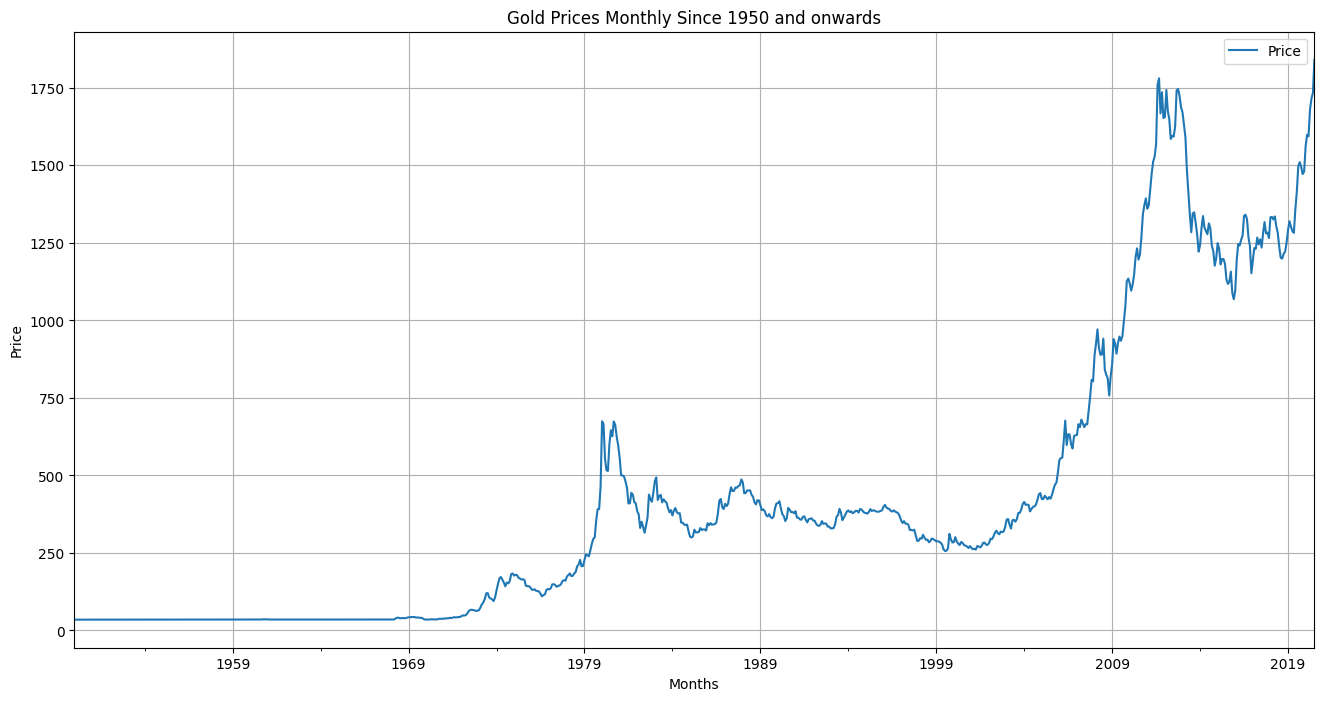

In [40]:
df.plot(figsize=(16, 8))
plt.title('Gold Prices Monthly Since 1950 and onwards')
plt.xlabel('Months')
plt.ylabel('Price')
plt.grid()

In [41]:
round(df.describe(), 2)

,Price
count,847.00
mean,416.56
std,453.67
min,34.49
25%,35.19
50%,319.62
75%,447.03
max,1840.81


Wide Range: The gold prices exhibit a broad range of values, spanning from 34.49 to 1840.81.
Average and Median: The mean gold price is 416.56, while the median is lower at 319.62, suggesting a right-skewed distribution.
Variability: With a standard deviation of 453.67, there is considerable variability around the mean, indicating fluctuation in prices over time.
Outliers: The presence of outliers is evident, with potential extreme values contributing to the skewness of the distribution.

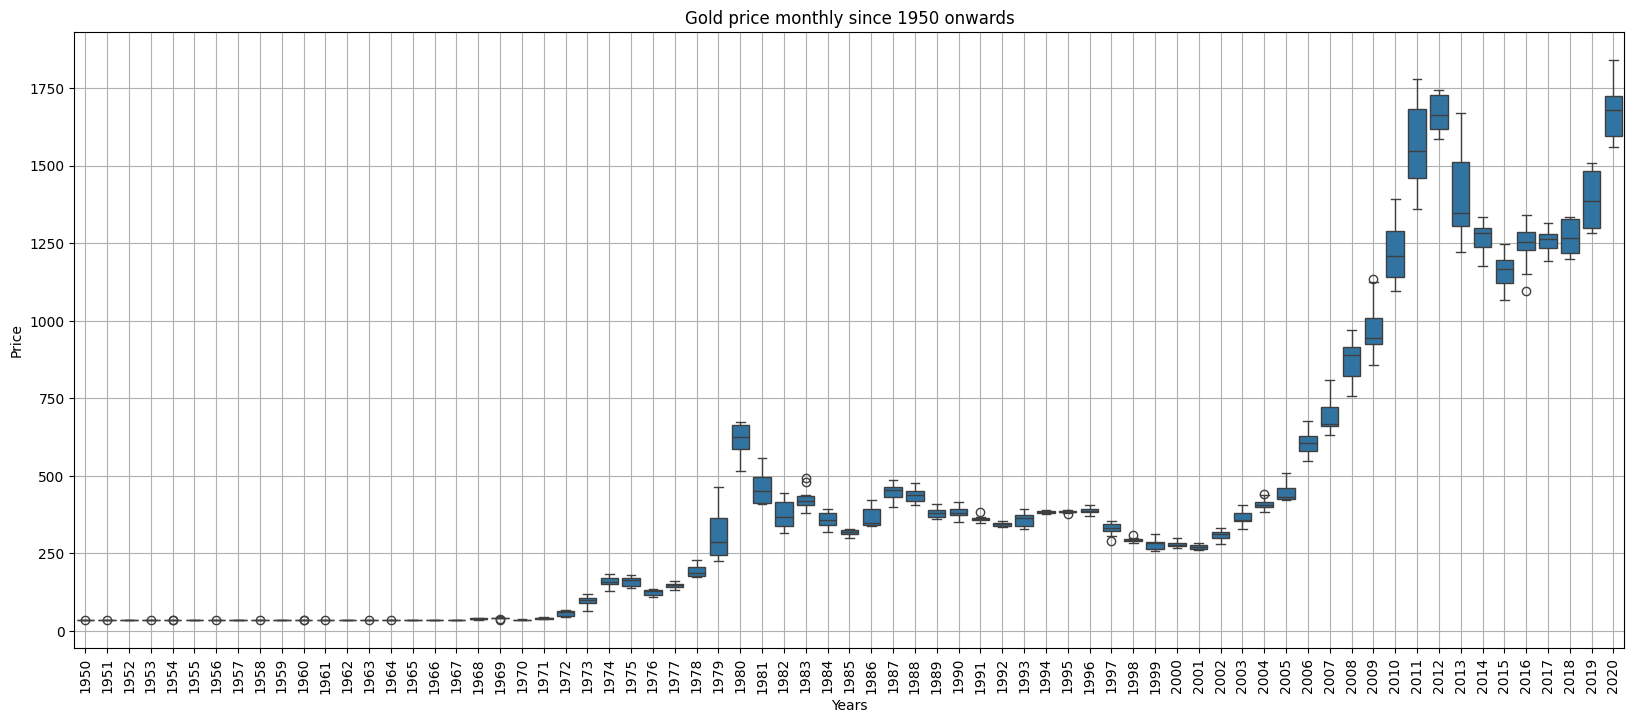

In [43]:
_, ax = plt.subplots(figsize=(20, 8))
sns.boxplot(x = df.index.year, y=df.values[:, 0], ax=ax)
plt.title('Gold price monthly since 1950 onwards')
plt.xlabel('Years')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.grid()

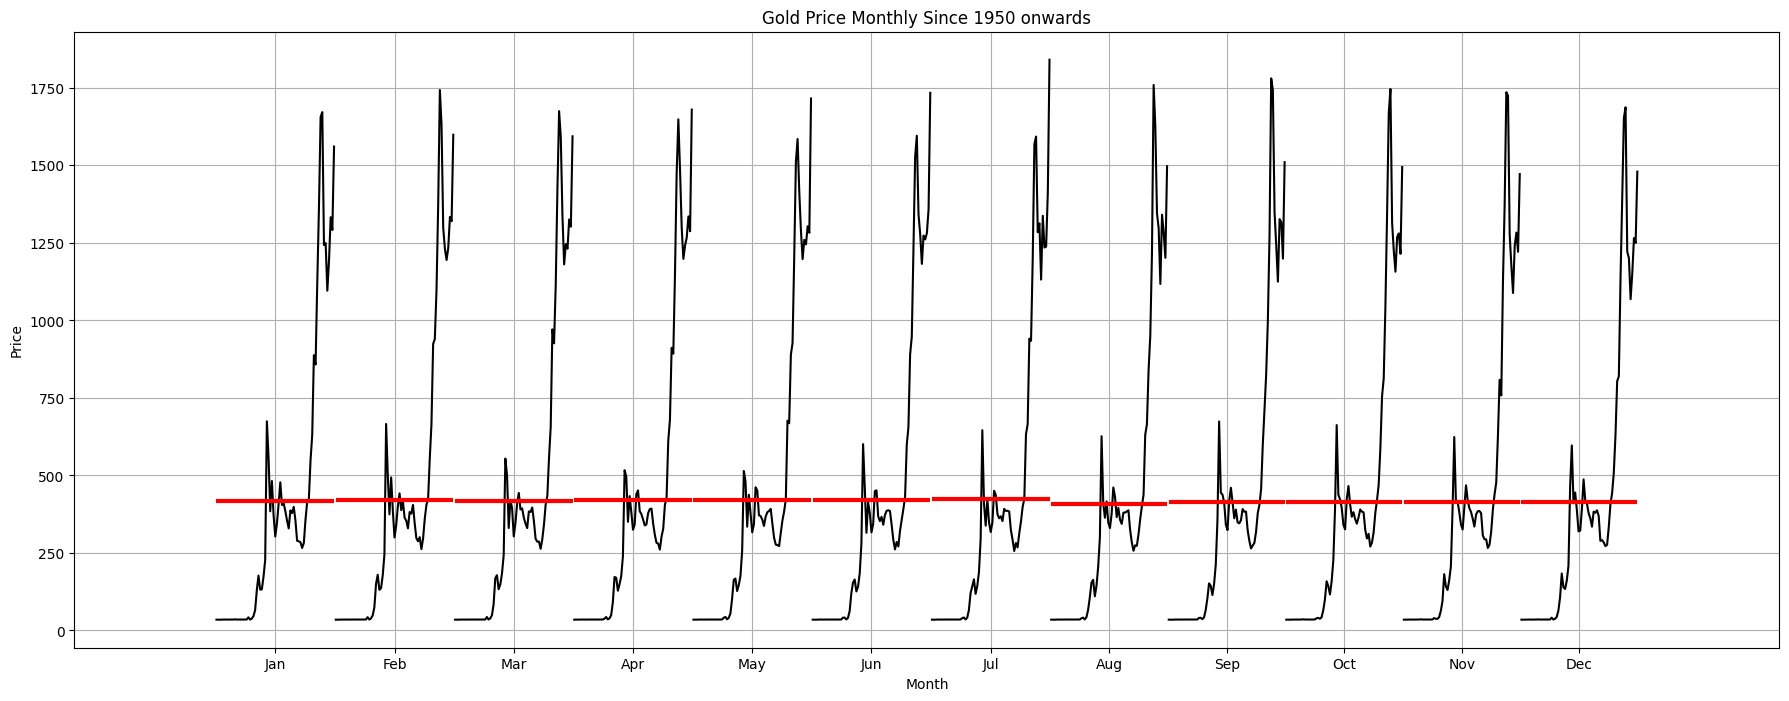

In [44]:
from statsmodels.graphics.tsaplots import month_plot
fig, ax = plt.subplots(figsize=(22, 8))
month_plot(df, ylabel='Gold Price', ax=ax)
plt.title('Gold Price Monthly Since 1950 onwards')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid()

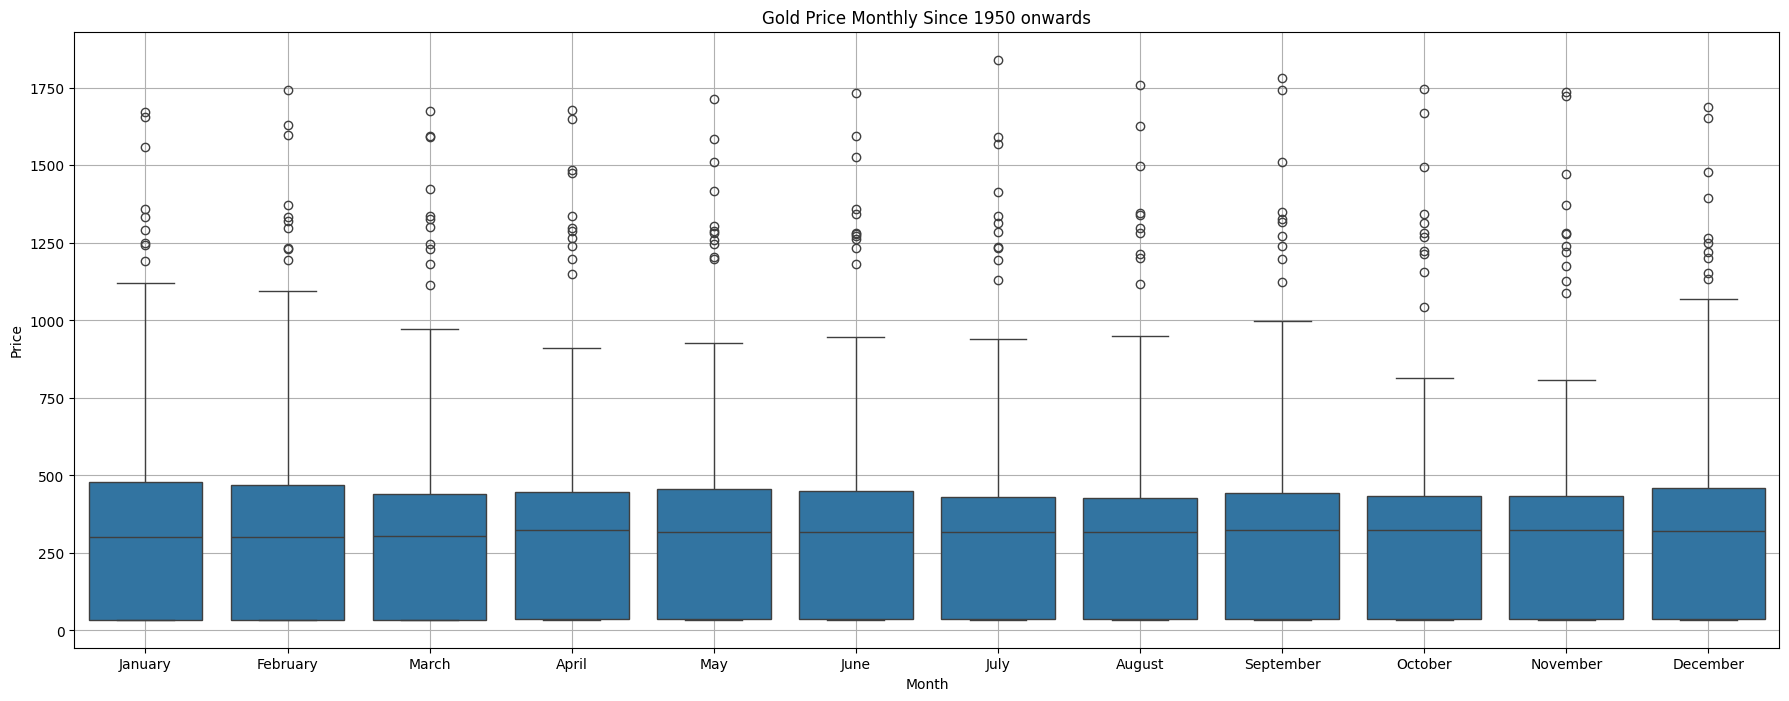

In [45]:
_, ax= plt.subplots(figsize=(22, 8))
sns.boxplot(x=df.index.month_name(), y=df.values[:, 0], ax=ax)
plt.title('Gold Price Monthly Since 1950 onwards')
plt.xlabel('Month')
plt.ylabel('Price')
plt.grid()

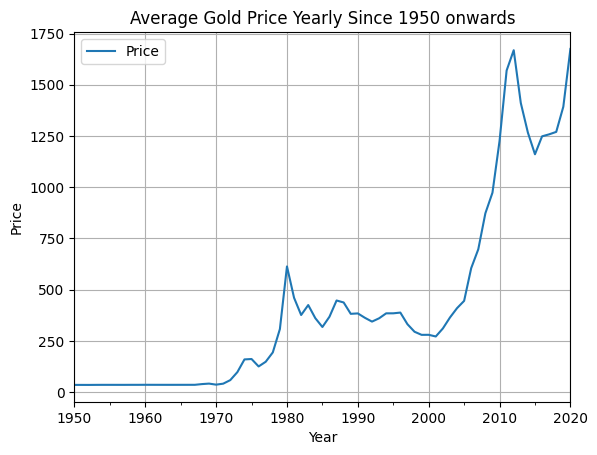

In [55]:
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot()
plt.title('Average Gold Price Yearly Since 1950 onwards')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid()

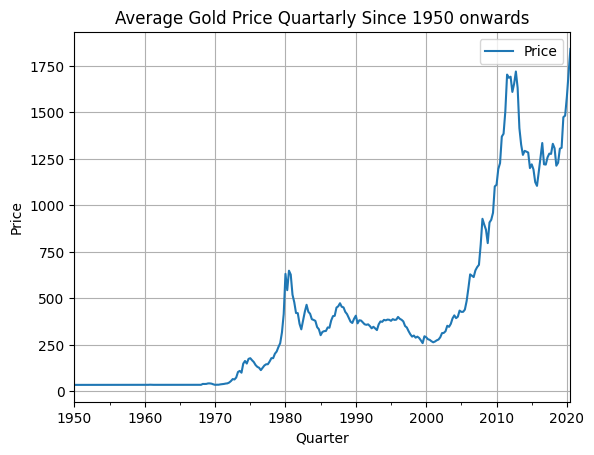

In [105]:
df_quarterly_sum = df.resample('Q').mean()
df_quarterly_sum.plot()
plt.title('Average Gold Price Quartarly Since 1950 onwards')
plt.xlabel('Quarter')
plt.ylabel('Price')
plt.grid()
plt.show()

In [67]:
df_1 = df.groupby(by=df.index.year).mean().rename(columns={'Price':'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns = {'Price':'Std'}), left_index=True, right_index=True)
df_1['coeff_of_variance'] = ((df_1.Std/ df_1.Mean)*100).round(2)
df_1.sort_values('coeff_of_variance', ascending=False)

,Mean,Std,coeff_of_variance
Date,,,
1979,307.303250,75.869684,24.69
1973,97.124500,16.687858,17.18
1972,58.104500,8.251597,14.20
1982,375.914083,44.899285,11.94
2013,1410.800167,149.661517,10.61
...,...,...,...
1965,35.127500,0.019598,0.06
1964,35.088333,0.014035,0.04
1963,35.084167,0.011645,0.03


In 1978, since the cv is higher indicates greater variability, higher risk, lower predictability.
But in 2015 onwards bit stable, predictable and lower variability
- **Yearly Variability:** Different years show varying levels of variability in gold prices. For instance, in 1979, prices fluctuated widely, with a coefficient of variation of 24.69%, whereas in 1950, prices remained relatively stable with a coefficient of variation of 0.01%.

- **Consistency and Stability:** The analysis reveals years of consistent and stable gold prices. For example, in 1950, the coefficient of variation was minimal at 0.01%, indicating a period of price stability.

- **Temporal Trends:** Trends over time highlight periods of fluctuating and stable gold prices. For instance, 1973 experienced higher volatility with a coefficient of variation of 17.18%, while 1982 showed greater stability with a coefficient of variation of 11.94%.

## Train Test Split

In [68]:
train =df[df.index.year <= 2015]
test = df[df.index.year > 2015]

In [71]:
print(train.shape, test.shape)

(792, 1) (55, 1)


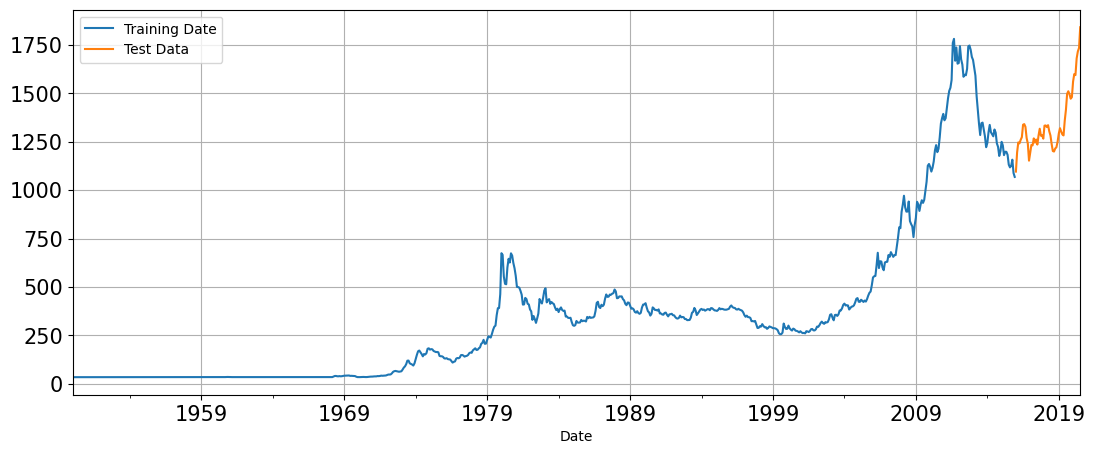

In [75]:
train.Price.plot(figsize=(13, 5), fontsize=15)
test.Price.plot(figsize=(13, 5), fontsize=15)
plt.grid()
plt.legend(['Training Date', 'Test Data'])
plt.show()

# Linear Regression model

In [76]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+ len(train) + 1 for  i in range(len(test))]
len(train_time), len(test_time)

(792, 55)

- **Numerical Representation:** Converting dates to a numerical 'time' column simplifies the modeling process by transforming temporal information into a linear, numerical format, devoid of complexities associated with date-based features.

- **Straightforward Modeling:** Utilizing linear regression with the 'time' column as a predictor facilitates a direct analysis of the linear relationship between time and gold prices, bypassing the intricacies of date-specific feature engineering.

In [80]:
from sklearn.linear_model import LinearRegression

In [81]:
LR_train = train.copy()
LR_test = test.copy()

In [82]:
LR_train['time'] = train_time
LR_test['time'] = test_time

In [83]:
lr = LinearRegression()
lr.fit(LR_train[['time']], LR_train['Price'].values)

LinearRegression()

In [85]:
test_predictions_model1 = lr.predict(LR_test[['time']])
LR_test['forecast'] = test_predictions_model1
LR_test.head()

,Price,time,forecast
Date,,,
2016-01-01,1095.655,793,895.511067
2016-02-01,1194.893,794,896.880902
2016-03-01,1246.312,795,898.250736
2016-04-01,1241.452,796,899.620570
2016-05-01,1259.755,797,900.990404


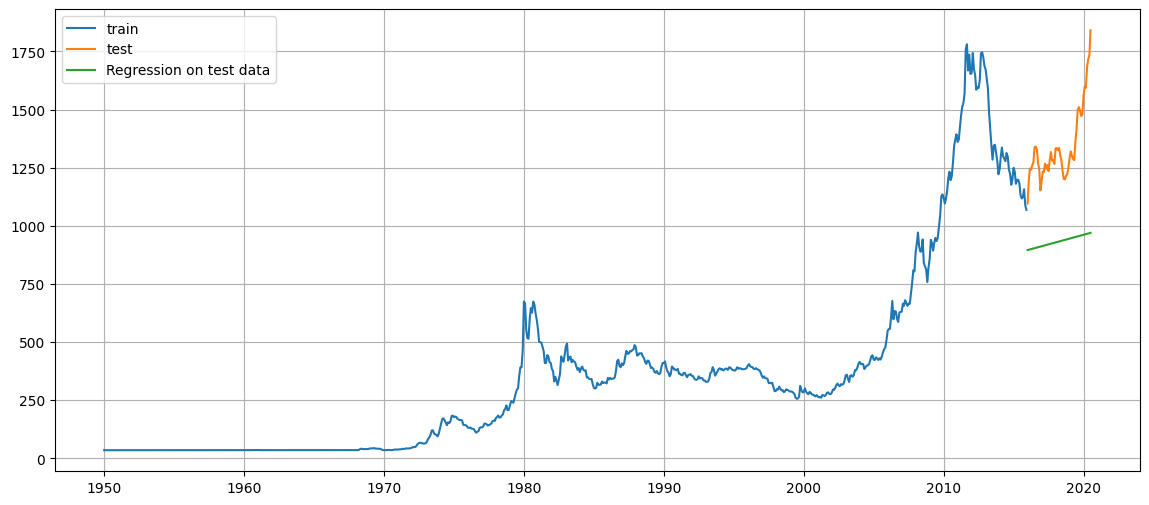

In [86]:
plt.figure(figsize=(14, 6))
plt.plot(train.Price, label='train')
plt.plot(test.Price, label='test')
plt.plot(LR_test.forecast, label='Regression on test data')
plt.legend(loc='best')
plt.grid()

In [87]:
# define mape function
def mape(actual, pred):
    ''' 
    test data as actual
    predicted values as pred
    
    return mape value'''
    return round((np.mean(abs(actual-pred ) / actual))* 100, 2)

In [88]:
mape_model1_test = mape(test.Price.values, test_predictions_model1)
print(f'MAPE is {mape_model1_test.round(3)} %')

MAPE is 29.76 %


In [89]:
results = pd.DataFrame({'Test MAPE (%)': [mape_model1_test]}, index=['LinearRegression'])
results

,Test MAPE (%)
LinearRegression,29.76


# Naive Model

In [90]:
naive_train = train.copy()
naive_test = test.copy()

In [92]:
naive_test['naive'] = np.array(train['Price'])[len(np.asarray(train['Price']))-1]
naive_test.head()

,Price,naive
Date,,
2016-01-01,1095.655,1068.317
2016-02-01,1194.893,1068.317
2016-03-01,1246.312,1068.317
2016-04-01,1241.452,1068.317
2016-05-01,1259.755,1068.317


- **Last Value Forecasting:** The code assigns the last observed price from the training data to all instances in the test dataset, simplifying forecasting by using a straightforward and easily implementable approach.

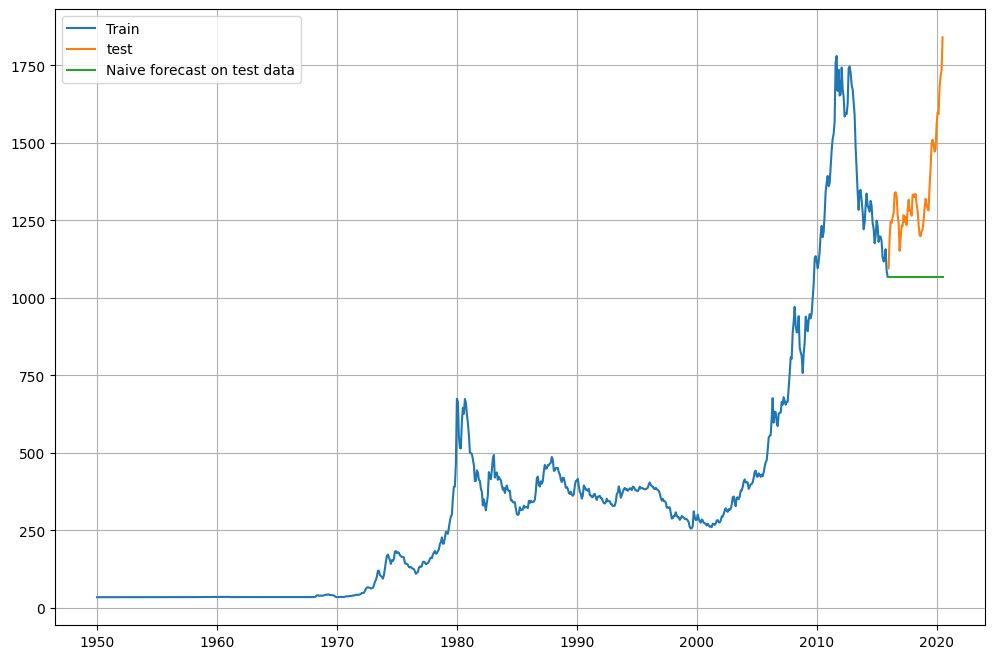

In [95]:
plt.figure(figsize=(12, 8))
plt.plot(naive_train.Price, label='Train')
plt.plot(test.Price, label='test')
plt.plot(naive_test['naive'], label='Naive forecast on test data')
plt.legend(loc='best')
plt.grid()

In [96]:
mape_model2_test = mape(test['Price'].values, naive_test['naive'].values)
print(f'For Naive forecasting on the test data, MAPE is %3.3f'%(mape_model2_test), '%')

For Naive forecasting on the test data, MAPE is 19.380 %


In [97]:
resultdf_2 = pd.DataFrame({'Test MAPE (%)': [mape_model2_test]}, index=['NaiveModel'])
results = pd.concat([results, resultdf_2])
results

,Test MAPE (%)
LinearRegression,29.76
NaiveModel,19.38


In [98]:
final_model = ExponentialSmoothing(df, trend='additive', seasonal='additive').fit(smoothing_level = 0.4, 
                                                                                  smoothing_trend=0.3,
                                                                                  smoothing_seasonal=0.6)

- **Exponential Smoothing Model:** The Exponential Smoothing model utilizes a weighted average of past observations to forecast future values, accounting for trend and seasonality in the data. By adjusting smoothing parameters for level, trend, and seasonality, the model captures different aspects of the time series dynamics to generate accurate predictions.

In [100]:
mape_final_model = mape(df.Price.values, final_model.fittedvalues)
print('MAPE:', mape_final_model)

MAPE: 17.24


In [101]:
predictions = final_model.forecast(steps=len(test))

In [103]:
pred_df = pd.DataFrame({'lower_CI': predictions - 1.96* np.std(final_model.resid, ddof=1),
                        'prediction': predictions,
                        'upper_CI': predictions + 1.96* np.std(final_model.resid, ddof=1)})
pred_df.head()

,lower_CI,prediction,upper_CI
2020-08-01,1684.718982,1792.869955,1901.020927
2020-09-01,1615.303307,1723.454279,1831.605251
2020-10-01,1538.563216,1646.714189,1754.865161
2020-11-01,1476.751963,1584.902935,1693.053908
2020-12-01,1459.318980,1567.469952,1675.620924


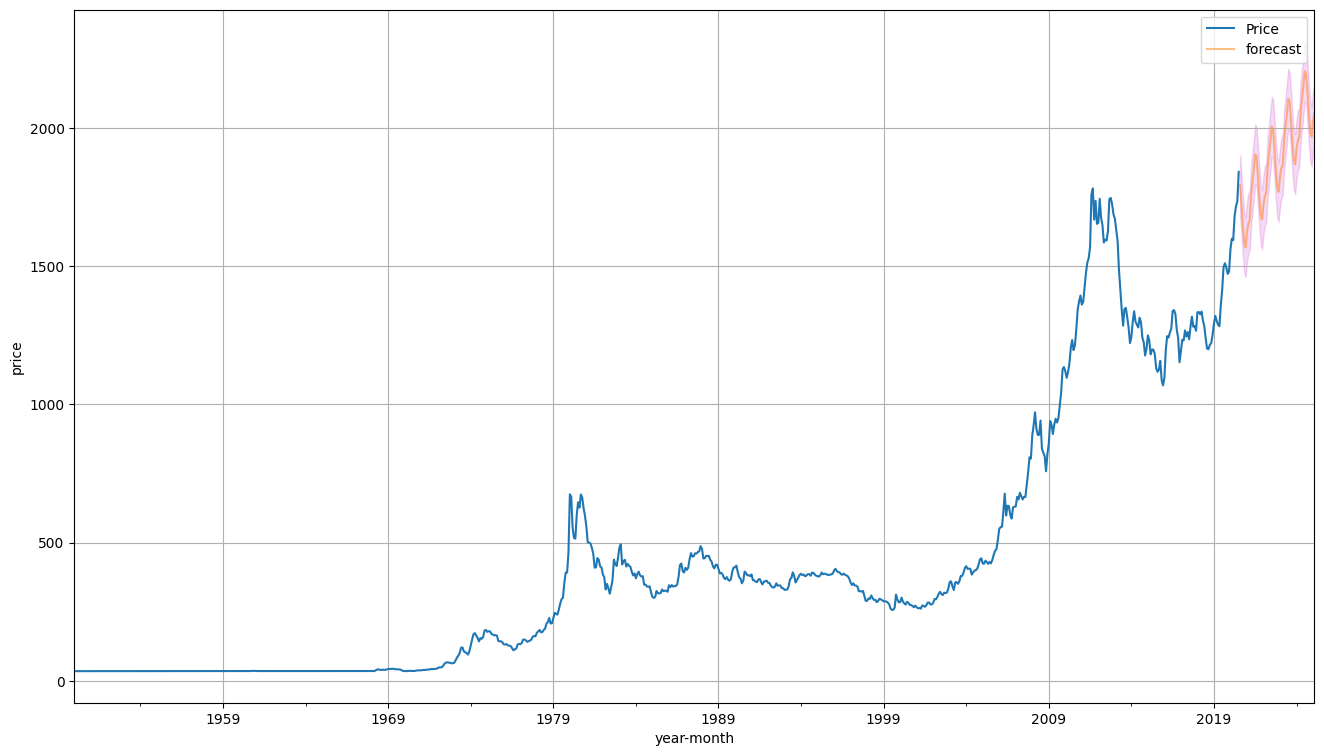

In [104]:
axis = df.plot(label = 'actual', figsize=(16, 9))
pred_df['prediction'].plot(ax=axis,label = 'forecast', alpha = 0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color='m', alpha=.15)
axis.set_xlabel('year-month')
axis.set_ylabel('price')
plt.legend(loc='best')
plt.grid()
plt.show()

# Conclusion

- **Prediction Interval:** Derived from the Exponential Smoothing model's residuals, the 95% prediction interval offers a range within which future gold prices are expected to fall, aiding in risk assessment and decision-making.

- **Reliability Gauge:** The width of the prediction interval reflects forecast uncertainty, guiding investors in evaluating the reliability of predictions and adjusting strategies accordingly.

- **Decision Support Tool:** By interpreting prediction intervals, investors can calibrate risk tolerance and refine investment strategies, leveraging confidence levels to navigate market dynamics effectively.

# Roadmap for future

- **Diversified Models:** Add more ways to predict gold prices, giving us a better understanding of how they might change in the future.

- **Smart Data Tricks:** Use clever methods to dig deeper into the data and find new insights that can make our predictions even better.

- **Dig Deeper:** Keep looking at the data to find more interesting trends and patterns that can help us make smarter decisions.

- **Better Scores:** Make sure our methods are doing well by constantly checking and improving how accurate they are.

- **Stronger Decision Support:** Combine all these improvements to make sure we're making the best decisions possible in the ever-changing world of gold prices.